<a href="https://colab.research.google.com/github/FrK06/Emotion_Detection_Testing/blob/main/Emotion_Detection_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Emotion Detection Using Colab**

## Overview
This code is designed to capture a photo using the device's webcam, detect faces in the captured image, and predict the emotion of each detected face using a pre-trained deep learning model.

### Importing Required Libraries
The process starts with importing essential libraries including` OpenCV` for image processing, `NumPy` for numerical operations, `TensorFlow/Keras` for loading and running the pre-trained emotion recognition model, `IPython` and `JavaScript` for capturing photos within Google Colab, and `Base64` for decoding the image data captured from the webcam.

### Capturing a Photo
The main function, `take_photo`, is defined to capture a photo using the device's webcam. This function uses embedded JavaScript to access the webcam, display a live video feed, and capture an image when a button is clicked. The captured image is saved as a JPEG file on the local filesystem.

### Loading the Trained Model
Once the photo is captured, the pre-trained emotion recognition model is loaded. This model, trained with TensorFlow/Keras, is capable of classifying faces into one of `seven emotions: Angry, Disgusted, Fear, Happy, Sad, Surprise, and Neutral.` A list of emotion labels is defined to map the model's output to these human-readable emotions.

### Detecting Faces
To detect faces in the captured photo, a pre-trained `Haar Cascade classifier` is loaded. This classifier, provided by OpenCV, works best on grayscale images, so the captured photo is converted to grayscale. The classifier then detects faces in the image and returns the coordinates of bounding boxes around each detected face.

### Processing Each Detected Face
For each detected face, the `region of interest` `(ROI)` is extracted from the original image. This face image is resized to 48x48 pixels, converted to grayscale, and preprocessed to match the input format expected by the emotion recognition model. The preprocessed face image is then fed into the model, which predicts the emotion. The emotion label with the highest probability is selected as the predicted emotion.

### Annotating and Displaying the Image
The original image is then annotated with the predicted emotion label and a rectangle around each detected face. The resulting image, showing the detected faces with rectangles and emotion labels, is displayed using OpenCV.

### How to Use the Code in Google Colab
To use the code in a Google Colab environment, simply run the code cell. The JavaScript embedded in the code will prompt you to allow access to your webcam. Click the "Capture" button to take a photo. The code will then process the captured photo, detect faces, and predict emotions. The processed image will be displayed, showing the detected faces with rectangles and the predicted emotion labels.

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 144ms/step


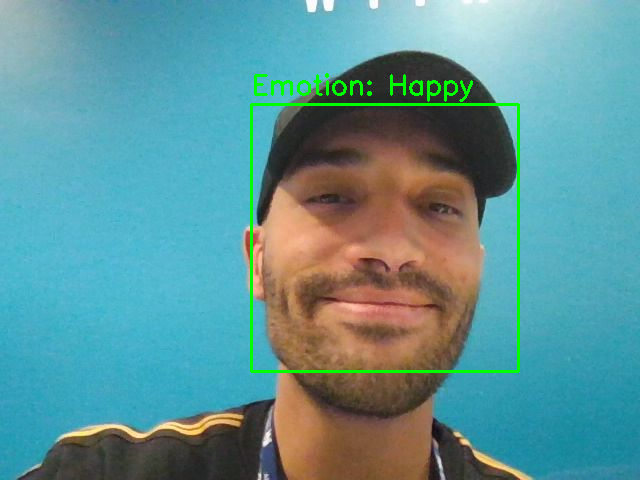

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Function to capture a photo
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  # Save the image to a file
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Capture a photo
photo_filename = take_photo()

# Load the trained model
model_best = load_model('/content/face_model (1).h5')

# Emotional states
class_names = ['Angry', 'Disgusted', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load the pre-trained face cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Read the captured photo
frame = cv2.imread(photo_filename)

# Convert the frame to grayscale for face detection
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Detect faces in the frame
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

# Process each detected face
for (x, y, w, h) in faces:
    # Extract the face region
    face_roi = frame[y:y+h, x:x+w]

    # Resize the face image to the required input size for the model
    face_image = cv2.resize(face_roi, (48, 48))
    face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
    face_image = image.img_to_array(face_image)
    face_image = np.expand_dims(face_image, axis=0)

    # Predict emotion using the loaded model
    predictions = model_best.predict(face_image)
    emotion_label = class_names[np.argmax(predictions)]

    # Display the emotion label on the image
    cv2.putText(frame, f'Emotion: {emotion_label}', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the processed image
from google.colab.patches import cv2_imshow
cv2_imshow(frame)


## Running Locally with a GPU
If you have a `GPU` available on your local machine, you could run this code locally instead of using Google Colab. This would enable `real-time` emotion recognition, leveraging the GPU's power to accelerate the deep learning model's predictions and the face detection process. By using a local environment with a GPU, you can capture images, detect faces, and predict emotions seamlessly and efficiently, providing immediate feedback and enhancing the overall user experience.